In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.getcwd())

c:\Users\thana\Desktop\TheShit\FRA503\class\week3


#Import data

In [2]:
#Example
#Dataset
#https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/classification_2classes.csv
df = pd.read_csv('https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/classification_2classes.csv')
df.head()

,X,Y,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


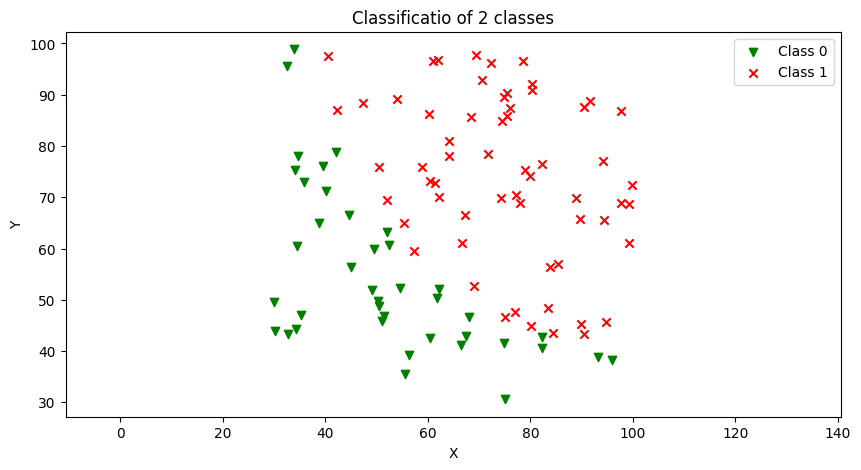

In [3]:
#plot
group0 = df[df['Label']==0]
group1 = df[df['Label']==1]

plt.figure(figsize=(10,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1')
plt.legend(loc='upper right')
plt.show()

#Data Preparation

In [4]:
#import machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
#Data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x = df[['X','Y']].values
y = df['Label'].values

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.1,random_state = 0)

In [6]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (90, 2)
y_train shape (90,)
X_test shape (10, 2)
y_test shape (10,)


#Model Building

In [7]:
#Build linear regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

# = theta0 + theta1*x _theta2*y
print("Theta0: ",model_logistic.intercept_[0])
print("Theta1: ",model_logistic.coef_[0][0])
print("Theta2: ",model_logistic.coef_[0][1])
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(model_logistic.intercept_[0],model_logistic.coef_[0][0],model_logistic.coef_[0][1]))

Theta0:  -2.445305729360579
Theta1:  2.798270938202645
Theta2:  2.8938866721459124
0 = -2.4453+2.7983x+2.8939y


#Results

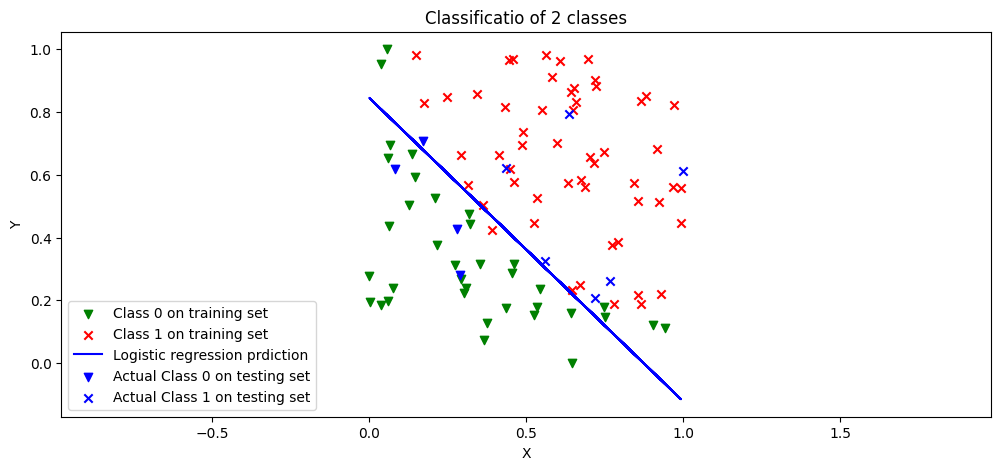

In [8]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group0_test = df_testing[df_testing['Label']==0]
group1_test = df_testing[df_testing['Label']==1]

plt.figure(figsize=(12,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
plt.plot(df_training['X'].values,(model_logistic.intercept_[0]+model_logistic.coef_[0][0]*df_training['X'].values)/((-1)*model_logistic.coef_[0][1]),'-b',label="Logistic regression prdiction")
plt.scatter(group0_test['X'],group0_test['Y'],marker='v',c='b',label='Actual Class 0 on testing set')
plt.scatter(group1_test['X'],group1_test['Y'],marker='x',c='b',label='Actual Class 1 on testing set')
plt.legend(loc="lower left")
plt.show()


In [9]:
#Predict on training set
y_pred = model_logistic.predict(x_train)

In [10]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.90      0.98      0.94        54

    accuracy                           0.92        90
   macro avg       0.93      0.91      0.92        90
weighted avg       0.93      0.92      0.92        90

Confusion matrix 
[[30  6]
 [ 1 53]]


c:\Users\thana\Desktop\TheShit\FRA503\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


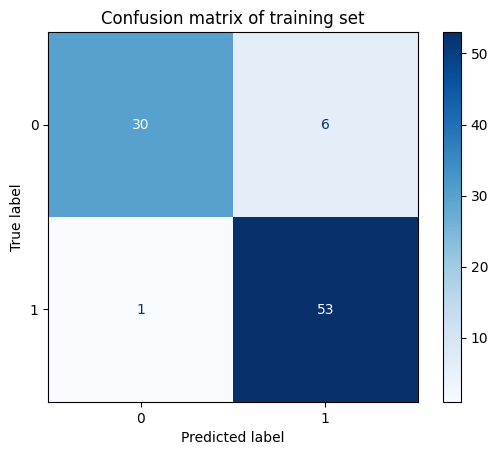

In [11]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [12]:
#Predict on testing set
y_pred = model_logistic.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [13]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

Confusion matrix 
[[3 1]
 [0 6]]


c:\Users\thana\Desktop\TheShit\FRA503\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


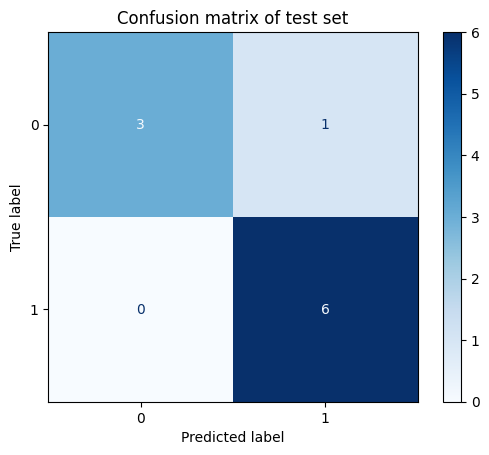

In [14]:
# Plot confusion matrix  of test set
plot_confusion_matrix(model_logistic,
                      x_test,
                      y_test,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 